In [1]:
#Import all the necessary libraries
import os
import pandas as pd

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
#View the current working directory
os.getcwd()

'C:\\Users\\najmi\\Downloads\\Best Restaurant Capstone Project'

In [3]:
#List all files in the directory
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Country-Code.xlsx',
 'data.xlsx',
 'Untitled.ipynb',
 'variable description.xlsx']

In [4]:
master_data = pd.read_excel('data.xlsx')
master_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873


In [5]:
#Identify the structure of the dataset that has been imported
master_data.shape

(9551, 19)

In [6]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
#Identify null values
master_data.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#Drop the row with a null value
master_data.dropna(subset=['Restaurant Name'], inplace=True)

In [10]:
#Verify number of remaining null values
master_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
#Address the remaining null values in the 'Cuisines' column by filling them with 'American' as the restaurants are in the US
master_data['Cuisines'].fillna('American', inplace=True)

In [15]:
#Confirm there is no null values in the dataset
master_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [17]:
#Check for any duplicates
master_data.duplicated().sum()

0

In [28]:
#Exploring geographical distribution of the restaurants
city_max_restaurant = master_data['City'].value_counts().idxmax()
city_min_restaurant = master_data['City'].value_counts().idxmin()

print("City with maximum number of restaurants:", city_max_restaurant)
print("City with minimum number of restaurants:", city_min_restaurant)

City with maximum number of restaurants: New Delhi
City with minimum number of restaurants: Phillip Island


In [29]:
#Explore distribution of ratings
master_data['Aggregate rating'].describe()

count    9550.000000
mean        2.666220
std         1.516386
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [34]:
#Explore franchise with the most national presence
print("Franchise with the most national presence:", master_data['Restaurant Name'].value_counts().idxmax())

Franchise with the most national presence: Cafe Coffee Day


In [40]:
#Count number of restaurants that allow table booking
table_booking_yes = (master_data['Has Table booking'] == 'Yes').sum()

#Count number of restaurants that do not allow
table_booking_no = (master_data['Has Table booking'] == 'No').sum()

#Calculate the ratio
ratio_table_booking = table_booking_yes/table_booking_no

print(f"Ratio between restaurants that allow table booking vs that do not: {ratio_table_booking:.2f}")

Ratio between restaurants that allow table booking vs that do not: 0.14


In [42]:
#Percentage of restaurants providing online delivery
master_data['Has Online delivery'].value_counts(normalize=True)*100

No     74.335079
Yes    25.664921
Name: Has Online delivery, dtype: float64

In [44]:
#Difference in no. of votes for restaurants that deliver and those that don't
master_data.groupby('Has Online delivery')['Votes'].describe()

,count,mean,std,min,25%,50%,75%,max
Has Online delivery,,,,,,,,
No,7099.0,138.042259,403.400599,0.0,2.0,18.0,98.0,10934.0
Yes,2451.0,211.307222,495.678439,0.0,29.0,79.0,195.0,9667.0


In [60]:
#Identify top 10 cuisines across cities
cuisines_df = master_data['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Cuisine')
cuisines_df.value_counts().head(10)

North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: Cuisine, dtype: int64

In [66]:
#Identify maximum and minimum no. of cuisines that a restaurant serves
split_cuisines = master_data['Cuisines'].str.split(', ')

num_cuisines = split_cuisines.apply(lambda x: len(x))

print('Maximum no. of cuisines served in a restaurant:', num_cuisines.max())
print('Minimum no. of cuisines served in a restaurant:', num_cuisines.min())

Maximum no. of cuisines served in a restaurant: 8
Minimum no. of cuisines served in a restaurant: 1


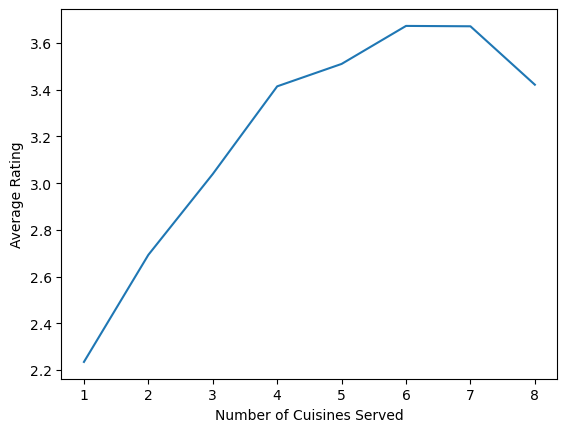

In [83]:
#Relationship between number of cuisines served in a restaurant and given ratings
avg_rating_by_cuisines = master_data.groupby(num_cuisines)['Aggregate rating'].mean()

plt.plot(avg_rating_by_cuisines.index, avg_rating_by_cuisines.values)
plt.xlabel('Number of Cuisines Served')
plt.ylabel('Average Rating')
plt.show()

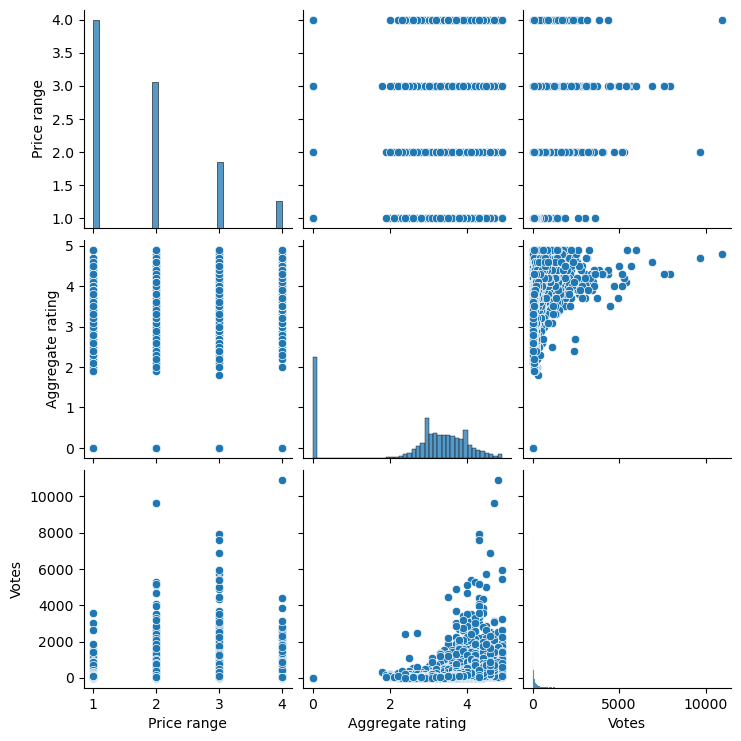

In [86]:
#Relationship between cost and other variables
columns_for_pairplot = ['Price range', 'Aggregate rating', 'Votes']
sns.pairplot(master_data[columns_for_pairplot])

In [87]:
#Relationship between cost and other variables
master_data.corr()['Price range']

Restaurant ID          -0.134419
Country Code            0.243393
Longitude              -0.078974
Latitude               -0.166668
Average Cost for two    0.075093
Price range             1.000000
Aggregate rating        0.437874
Votes                   0.309308
Name: Price range, dtype: float64

In [88]:
#Relationship between rating and various factors
master_data.corr()['Aggregate rating']

Restaurant ID          -0.326144
Country Code            0.282234
Longitude              -0.116843
Latitude                0.000541
Average Cost for two    0.051797
Price range             0.437874
Aggregate rating        1.000000
Votes                   0.313598
Name: Aggregate rating, dtype: float64